## Observations and Insights 

# Observations:

1) Based on the summary statistics table and box plot: Capomulin and Ramicane appear to be two of the relatively most effective drugs at minimizing tumor volume. Their mean and median tumor volume values hover around 40 mm3.

2) Based on the line plot: The plot for s185 implies Capomulins may be effective at decreasing tumor volume over time. Tumor volume decreased from 45 mm3 to less than 25 over the course of the mouse experiment. (That said, the line plot is of one individual mouse (small sample) and there were no comparable line charts made with other drugs)

3) Based on the correlation data/scatterplot: There appears to be a fairly significant correlation between average weight and average tumor volume in mice. The heavier the mouse, the more likely they are to have relatively higher tumor volume.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "/Users/emilyye/BOOTCAMP WORK/upenn-phi-virt-data-09-2021-u-c/05-Matplotlib/Homework/Instructions/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/emilyye/BOOTCAMP WORK/upenn-phi-virt-data-09-2021-u-c/05-Matplotlib/Homework/Instructions/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")



In [2]:
# Checking the number of mice. Length at the bottom indicates 249 mice
number_mice = mouse_results["Mouse ID"].value_counts()
number_mice

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Figure out which mouse ID has duplicates; set up a dataframe to hold that series info. Print to view 

dup_mice = mouse_results.duplicated(subset=["Mouse ID", "Timepoint"],keep=False) 

mouse_results_view_dupes = mouse_results

mouse_results_view_dupes["duplicated"] = dup_mice

mouse_results_view_dupes = mouse_results_view_dupes.loc[mouse_results["duplicated"] == True,:]

mouse_results_view_dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_results_clean = mouse_results.loc[mouse_results["Mouse ID"] != "g989",:]

In [5]:
# Checking the number of mice in the clean DataFrame.
len(mouse_results_clean["Mouse ID"].unique())

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mr_mean = mouse_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
mr_median = mouse_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
mr_variance = mouse_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
mr_std = mouse_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
mr_sem = mouse_results_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summ_stats = pd.DataFrame({
    "Mean of Tumor Volume (TV)": mr_mean,
    "Median of TV": mr_median,
    "Variance of TV": mr_variance,
    "Standard Deviation of TV": mr_std,
    "Standard Error of the Mean of TV": mr_sem
})
summ_stats



,Mean of Tumor Volume (TV),Median of TV,Variance of TV,Standard Deviation of TV,Standard Error of the Mean of TV
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of TimePoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='No. of Timepoints'>

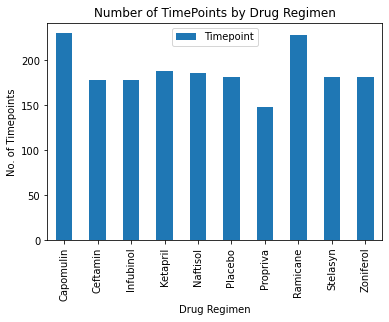

In [7]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# df for timepoints by drug

tp_by_drug_pd = mouse_results_clean[["Drug Regimen","Timepoint"]]
tp_by_drug_pd = tp_by_drug_pd.groupby(["Drug Regimen"]).count()

# plot the df

tp_by_drug_pd.plot(kind = "bar", title = "Number of TimePoints by Drug Regimen", ylabel = "No. of Timepoints")

Text(0.5, 1.0, 'Number of TimePoints by Drug Regimen')

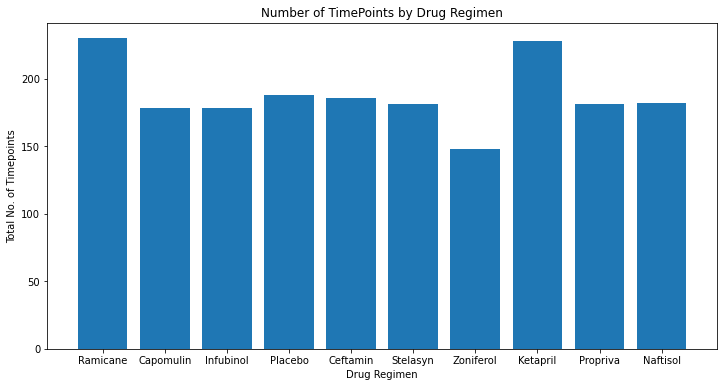

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mouse_results_clean["Drug Regimen"].unique()
y_axis = mouse_results_clean.groupby(["Drug Regimen"]).count()["Timepoint"]

# plot the data + stretch the figure size so the x tick values (drug names) are not smashed together and are readable
plt.figure(figsize=(12,6))
plt.bar(x_axis, y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("Total No. of Timepoints")
plt.title("Number of TimePoints by Drug Regimen")

<AxesSubplot:title={'center':'No. of Female vs. Male Mice'}>

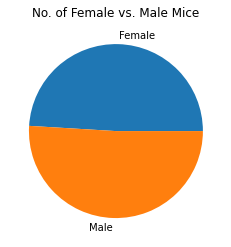

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex = mouse_results_clean.groupby(["Sex"]).count()["Mouse ID"] 

sex.plot(kind="pie",ylabel = "", title = "No. of Female vs. Male Mice")

Text(0.5, 1.0, 'No. of Female vs. Male Mice')

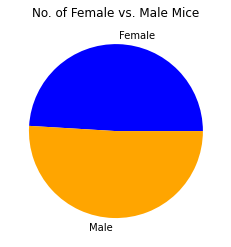

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_number = [len(mouse_results_clean.loc[mouse_results_clean["Sex"] == "Female",:]),len(mouse_results_clean.loc[mouse_results_clean["Sex"] == "Male",:])]
sex_labels = ["Female","Male"]
colors = ["blue","orange"]
plt.pie(sex_number, labels=sex_labels, colors=colors)
plt.title("No. of Female vs. Male Mice")


## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = mouse_results_clean.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_vol = mouse_results_clean[["Mouse ID","Tumor Volume (mm3)", "Drug Regimen", "Timepoint"]]

final_tumor_vol = pd.merge(greatest_tp, tumor_vol, on= ["Mouse ID","Timepoint"], how = "inner")

# isolate to the four drugs that the instructions want:

final_tumor_vol_Cap = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == "Capomulin"]
final_tumor_vol_Ram = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == "Ramicane"]
final_tumor_vol_Inf = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == "Infubinol"]
final_tumor_vol_Cef = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == "Ceftamin"]


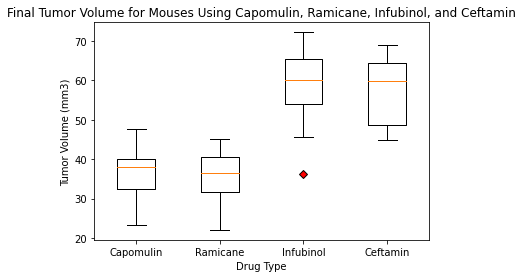

Capomulin:
first, second, third, and fourth quartiles: 32.37735684, 38.1251644, 40.1592203,47.68596303
IQR: 7.781863460000004
lower, upper bounds: 20.70456164999999,51.83201549
lower outliers: []
upper outliers: []
Ramicane:
first, second, third, and fourth quartiles: 31.56046955, 36.56165229, 40.65900627,45.22086888
IQR: 9.098536719999998
lower, upper bounds: 17.912664470000003,54.30681135
lower outliers: []
upper outliers: []
Infubinol:
first, second, third, and fourth quartiles: 54.04860769, 60.16518046, 65.52574285,72.2267309
IQR: 11.477135160000003
lower, upper bounds: 36.83290494999999,82.74144559000001
lower outliers: [36.3213458]
upper outliers: []
Ceftamin:
first, second, third, and fourth quartiles: 48.72207785, 59.85195552, 64.29983003,68.92318457
IQR: 15.577752179999997
lower, upper bounds: 25.355449580000002,87.66645829999999
lower outliers: []
upper outliers: []


In [12]:
# pull out the final tumor volume data for each drug

tumor_vol_list_Cap = final_tumor_vol_Cap["Tumor Volume (mm3)"]
tumor_vol_list_Ram = final_tumor_vol_Ram["Tumor Volume (mm3)"]
tumor_vol_list_Inf = final_tumor_vol_Inf["Tumor Volume (mm3)"]
tumor_vol_list_Cef = final_tumor_vol_Cef["Tumor Volume (mm3)"]

# plot the box, including a color/format change for the outlier

red_diamond = dict(markerfacecolor='r', marker='D')

four_drug_tumor_vol = plt.boxplot([tumor_vol_list_Cap,tumor_vol_list_Ram, tumor_vol_list_Inf, tumor_vol_list_Cef], flierprops = red_diamond)

# put in the title and the labels
plt.title("Final Tumor Volume for Mouses Using Capomulin, Ramicane, Infubinol, and Ceftamin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Type")

positions = [1,2,3,4]
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

plt.xticks(positions, labels)

plt.show()

# run a loop to calculate quartile, IQR, lower and upper bounds, and potential outliers for each drug

for drug in labels:
    
    # calculate the quartile, iqr, and upper and lower bound values 
    drug_tumor_data = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == drug,:]
    tumor_vol_data = drug_tumor_data["Tumor Volume (mm3)"]
    quartiles = tumor_vol_data.quantile([0.25, 0.5, 0.75, 1.0])
    firstq = quartiles[0.25]
    secondq = quartiles[0.5]
    thirdq = quartiles[0.75]
    fourthq = quartiles[1.0]
    iqr = thirdq - firstq
    lower_bound = firstq - (1.5*iqr)
    upper_bound = thirdq + (1.5*iqr)
    
    # find outliers, if there are any
    
    outlier_lower = []
    outlier_upper = []

    for x in tumor_vol_data:
        if x < lower_bound:
            outlier_lower.append(x)
        if x > upper_bound:
            outlier_upper.append(x)
    
    # print answers before moving onto the next drug
    
    print(drug + ":")
    print(f"first, second, third, and fourth quartiles: {firstq}, {secondq}, {thirdq},{fourthq}")
    print(f"IQR: {iqr}")
    print(f"lower, upper bounds: {lower_bound},{upper_bound}")
    print(f"lower outliers: {outlier_lower}")
    print(f"upper outliers: {outlier_upper}")



## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume Over Time for s185')

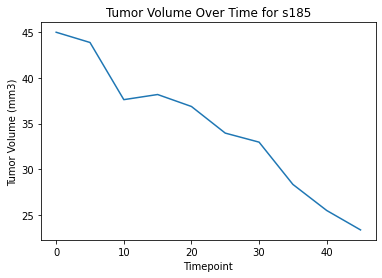

In [13]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


# first find a mouse that was treated with Capomulin
mouse_capomulin = mouse_results_clean.loc[mouse_results_clean["Drug Regimen"] == "Capomulin",:]
mouse_sample = mouse_capomulin.sample()

# Based on printed sample, Mouse ID s185 was identified as a mouse that used Capomulin. 
# Gather that individual mouse's data

indMouse_data = mouse_results_clean.loc[mouse_results_clean["Mouse ID"] == "s185",:]

# Generate the x and y label axis data

indMouse_x = indMouse_data["Timepoint"]
indMouse_y = indMouse_data["Tumor Volume (mm3)"]

# plot the data
plt.plot(indMouse_x, indMouse_y)

# label the data
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for s185")


Text(0.5, 1.0, 'Capomulin Mice: Average Weight vs. Average Tumor Volume (mm3)')

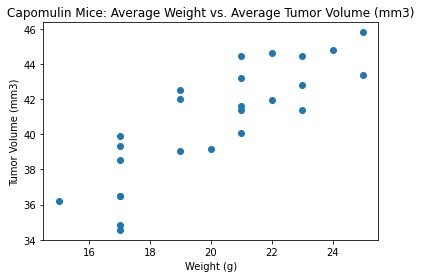

In [14]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_data = mouse_results_clean.loc[mouse_results_clean["Drug Regimen"] == "Capomulin",:]
cap_tumor = capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
cap_weight = capomulin_data.groupby(["Mouse ID"])["Weight (g)"].mean()

plt.scatter(cap_weight, cap_tumor)

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Mice: Average Weight vs. Average Tumor Volume (mm3)")

## Correlation and Regression

In [15]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(cap_weight,cap_tumor)
final_corr = correlation[0]
print(f"The correlation coefficient is {final_corr}")


The correlation coefficient is 0.8419363424694718


Text(0.5, 1.0, 'Tumor Volume (mm3) by Weight (g)')

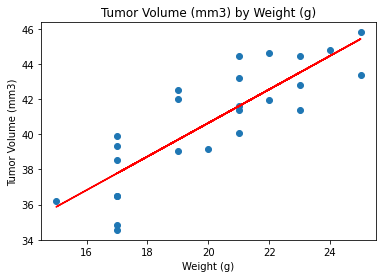

In [16]:
# calculate the linear regression model and then plot with linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_weight, cap_tumor)
regress_value = cap_weight*slope+intercept

plt.scatter(cap_weight,cap_tumor)
plt.plot(cap_weight, regress_value, "r-")

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume (mm3) by Weight (g)")